# Assignment: Trees
Do three questions.

In [1]:
! git clone https://github.com/yuinab/trees

Cloning into 'trees'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 127 (delta 18), reused 5 (delta 5), pack-reused 101 (from 1)
Receiving objects: 100% (127/127), 74.68 MiB | 30.45 MiB/s, done.
Resolving deltas: 100% (30/30), done.


**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

In [ ]:
#1
#Trees are constructed by splitting the data based on what best separates the target variable.
#It keeps splitting the data until there is a stopping condition

#2
#Trees are good at handling non-linear relationships between variables because it does not assume the data behaves in a particular way.
#It adapts to patterns that exist in the data.

#3
#Gini is a good loss function for categorical variables because it measures how mixed the classes are in a node.
#It helps classify to make sure each node is a pure as possible.

#4
#Trees overfit because it keeps splitting to capture every detail. This makes it very particular towards the training data.
#This can be overcome through setting a maximum depth or limiting the number of leaf nodes.

#5
#False, trees can perform well in situations with minimal categorical variables. They can split on numeric variables.
#For example, it can just split based off x>42.

#6
#Having too many branches can lead to overfitting quickly and makes the model less interpretive.

#7
#Some signs of overfitting are the tree being very deep and many tiny branches with few samples.
#Some signs of underfitting are the tree being very shallow and the training and testing accuracy being low.


**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

(976, 12)
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  
1 Rsq  :  0.7822678561

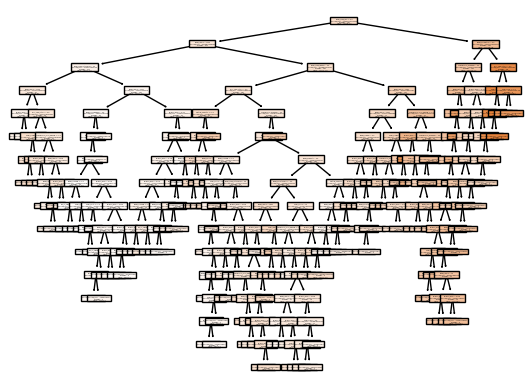

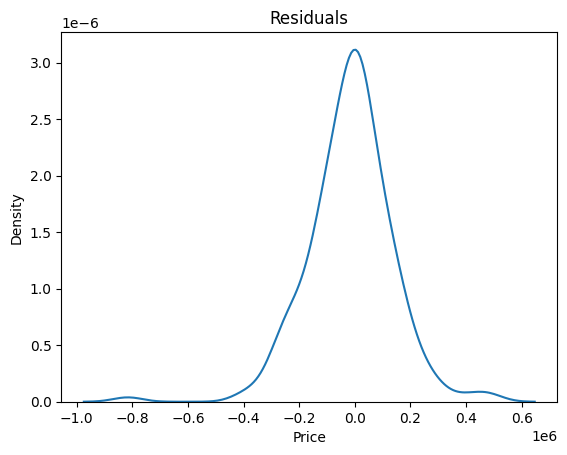

Rsq  :  0.8195823185704367 

RMSE :  151927.57834571658 

Test RMSE: 116872.61840512503
Test R squared measure:0.8930261670361792


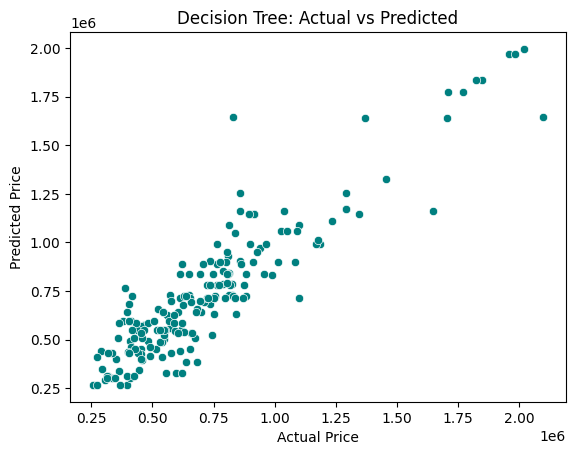

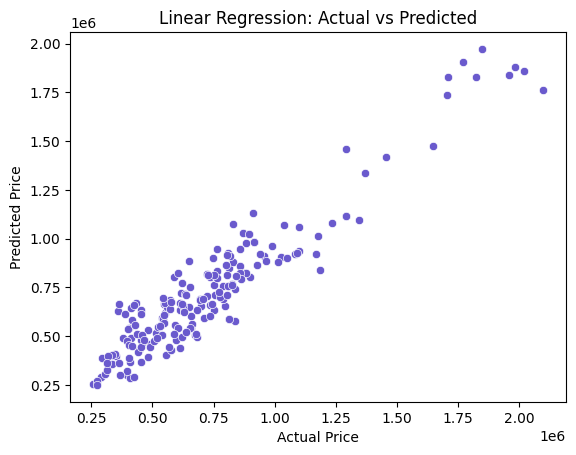

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# 1. Load the dataset
df = pd.read_csv('trees/assignment/data/cars_hw.csv')
print(df.shape)
#976 observations with 12 variables
print(df.head())

#2
numeric_columns = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
categorical_columns = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']

y = df['Price']
X = df[numeric_columns + categorical_columns].copy()
# Maxmin normalization function; Sci-kit calls it the "standard scaler" (changed for constant values)
def maxmin(z):
    return (z - z.min()) / (z.max() - z.min()) if z.min() != z.max() else z

X[numeric_columns] = X[numeric_columns].apply(maxmin) # Normalize X

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
# Split the sample:
X_train, X_test, y_train, y_test = train_test_split(X, y, # Feature and target variables
                                                    test_size=0.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

#3
from sklearn.tree import DecisionTreeRegressor # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree classifier
from sklearn import tree # Import the tree classifier

for leaf in range(1,25):
  cart = tree.DecisionTreeRegressor(min_samples_leaf=leaf,random_state=100)
  ## Make Predictions on the Test Set:
  cart = cart.fit(X_train, y_train) # Fit the classifier
  y_hat = cart.predict(X_test)
  print(leaf, 'Rsq  : ', cart.score(X_test, y_test), '\n')

#4 scores the highest Rsq value in the data

#4
## Fit the tree:
cart = tree.DecisionTreeRegressor(min_samples_leaf=4,random_state=500)

## Make Predictions on the Test Set:
cart = cart.fit(X_train, y_train) # Fit the classifier
y_hat = cart.predict(X_test)

# Visualize results:
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()
## Residuals, Rsq, RMSE
e = y_test - y_hat
sns.kdeplot(e).set(title='Residuals') # Notice the residuals aren't centered around zero
plt.show()

rsq = 1-np.sum(e**2)/np.sum( (y_test - np.mean(y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq  : ', rsq, '\n')
print('RMSE : ', RMSE, '\n')
#Centered around 0 but not really symmetrical: more values in the negative side
#5

test_reg = LinearRegression().fit(X_test, y_test) # Fit the linear model
y_test_pred = test_reg.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {test_rmse}")
print(f"Test R squared measure:{test_reg.score(X_test, y_test)}") # R squared measure

#The linear regression performs better, with a higher Rsq value and lower RMSE value.
#This is because the test set is more linear so the linear regression describes the values more in line with what is going on with the data.

#6

# Create a DataFrame to hold both predictions
predictions_df = pd.DataFrame({
    'Decision Tree Predictions': y_hat,
    'Linear Regression Predictions': y_test_pred,
    'Actual Price': y_test.values
})

# Scatterplot: Actual vs Predicted (Decision Tree)
sns.scatterplot(x=y_test, y=y_hat, color='teal')
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Scatterplot: Actual vs Predicted (Linear Regression)
sns.scatterplot(x=y_test, y=y_test_pred, color='slateblue')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

#The linear regression is more tightly bound and has less outliers.


**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

(2029, 31)
  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432   0.141608   

   daysOfSalesOutstanding  ...  effectiveTaxRate  \
0               44.203245  ..

col_0,A,B,C
Rating,,,
A,106,0,0
B,0,293,0
C,0,0,7


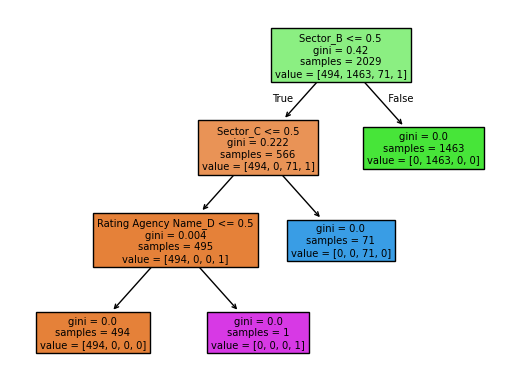

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Plot the tree


# 1. Load the dataset
df = pd.read_csv('trees/assignment/data/corporate_ratings.csv')
print(df.shape)
print(df.head())

#2
plt.hist(df['Rating'])
df['Rating'] = df['Rating'].replace(['AA', 'AAA'], 'A')
df['Rating'] = df['Rating'].replace(['BB', 'BBB'], 'B')
df['Rating'] = df['Rating'].replace(['CC', 'CCC'], 'C')

#3
df_filtered = df.drop(columns=['Sector','Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name'])
hot_code = pd.get_dummies(df, 'Sector', drop_first=True)
X = pd.concat([df_filtered, hot_code], axis=1)
print(X.head())
y = df['Rating']

#4
X_train, X_test, y_train, y_test = train_test_split(X, y, # Feature and target variables
                                                    test_size=0.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

# Fit decision tree:
cart = DecisionTreeClassifier() # Create a classifier object
cart = cart.fit(X, y) # Fit the classifier

## Make Predictions on the Test Set:
y_hat = cart.predict(X_test)

# Visualize results:
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)

tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test) # Compute Accuracy
#acc = np.trace(tab)/len(y_test)  # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

#The different bond ratings seem to have been predicted with a very high accuracy.

#5
hot_code_2 = pd.get_dummies(df, 'Rating Agency Name', drop_first=True)
X = pd.concat([X, hot_code_2], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, # Feature and target variables
                                                    test_size=0.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

# Fit decision tree:
cart = DecisionTreeClassifier() # Create a classifier object
cart = cart.fit(X, y) # Fit the classifier

# Visualize results:
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)

## Make Predictions on the Test Set:
y_hat = cart.predict(X_test)
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test) # Compute Accuracy
#acc = np.trace(tab)/len(y_test)  # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

#The results do not change when rating agency name does. This means that it does not affect the prediction of the model much.



**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?